In [31]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

## Vivienda

In [32]:
file = "../../data/enh/vivienda.csv"

In [33]:
df = pd.read_csv(file)

C:\Users\aniit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
df.shape

(58066, 109)

In [60]:
df_copy=df.copy()

## Check NA

In [61]:
df_copy.isnull().any().any()

False

In [62]:
["folioviv", ]

['folioviv']

In [63]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [64]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

In [65]:
for column in df_copy.columns:
    print(column, ': ', df_copy[column].unique())

folioviv :  [ 100006018  100006037  100006055 ... 3260791175 3260791176 3260791187]
tipo_viv :  ['1' '2' '3' nan '4' '5' 1 2 3 4 5]
condominio :  [nan '4' '3' '5' '2' '6' '7' '8' '13' '11' '12' '9' '14' '10' '16' '15']
elevador :  [nan '2' '1']
mat_pared :  [8 7 1 3 6 2 4 5]
mat_techos :  [9 7 3 6 1 8 4 2 5]
mat_pisos :  [3 2 1]
ais_techos :  [2 9 1]
ais_pared :  [2 9 1]
ais_ventan :  [2 9 1]
ais_otro :  [2 9 1]
antiguedad :  [nan '30' '38' '8' '20' '27' '40' '21' '25' '6' '41' '18' '50' '35' '17'
 '45' '60' '46' '15' '33' '55' '42' '0' '99' '70' '80' '39' '26' '48' '66'
 '22' '49' '24' '32' '29' '10' '11' '12' '14' '2' '3' '7' '34' '13' '28'
 '56' '5' '31' '36' '37' '23' '16' '19' '4' '9' '1' '90' '54' '43' '52'
 '65' '44' '47' '53' '58' '77' '51' '91' '85' '74' '63' '75' '62' '57'
 '64' '69' '76' '83' '68' '72' '73' '81' '78' '86' '59' '94' '87' '61'
 '71' '98' '95']
cocina :  [1 2]
cocina_dor :  ['2' '1' nan]
cuart_dorm :  [ 3  2  4  1  5  6  8  7  9 11]
num_cuarto :  [ 5  6  7  9  

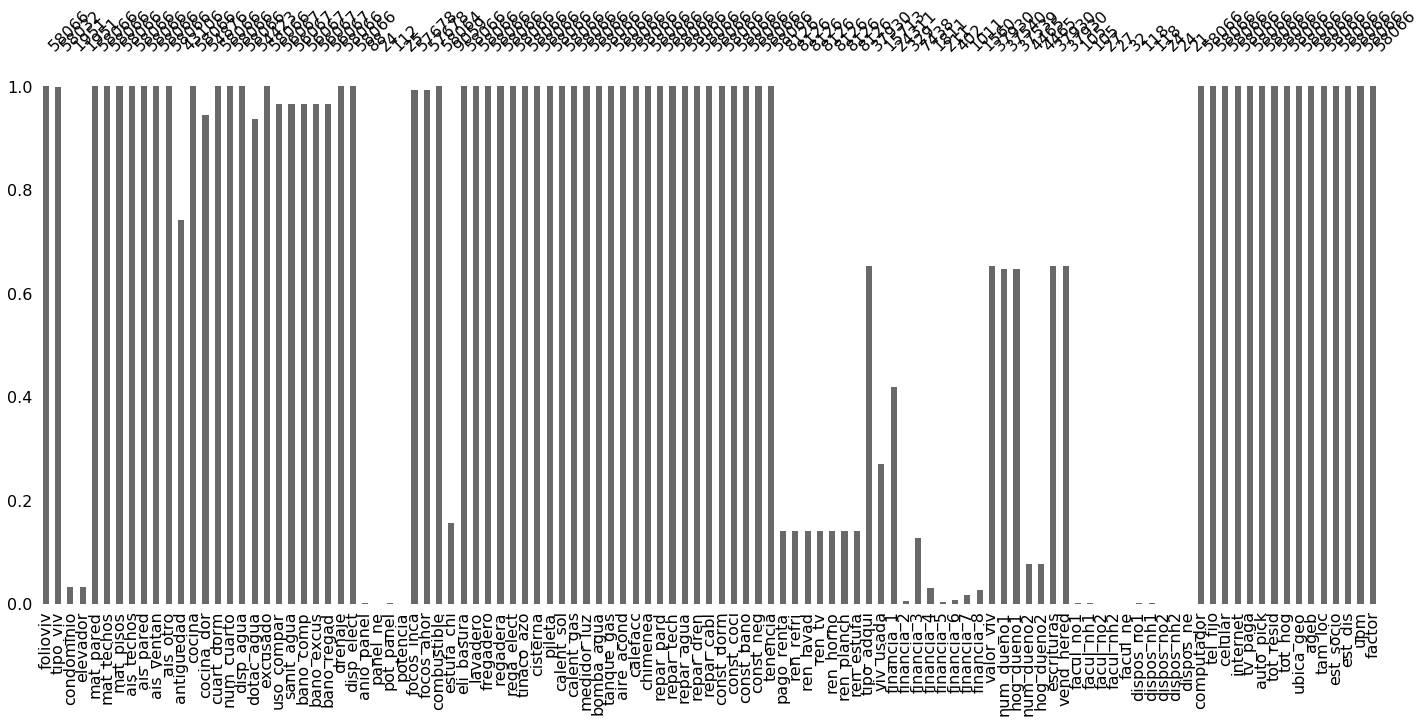

In [66]:
msno.bar(df_copy)

In [43]:
df_copy.fillna(value=-1, inplace=True)

In [57]:
threshold = round(df_copy.shape[0]*.75)
threshold

37982

In [58]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        #print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            #print(column, ': ', 'd e l e t e d')
            l.append(column)

In [59]:
len(l)

0

In [47]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [48]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

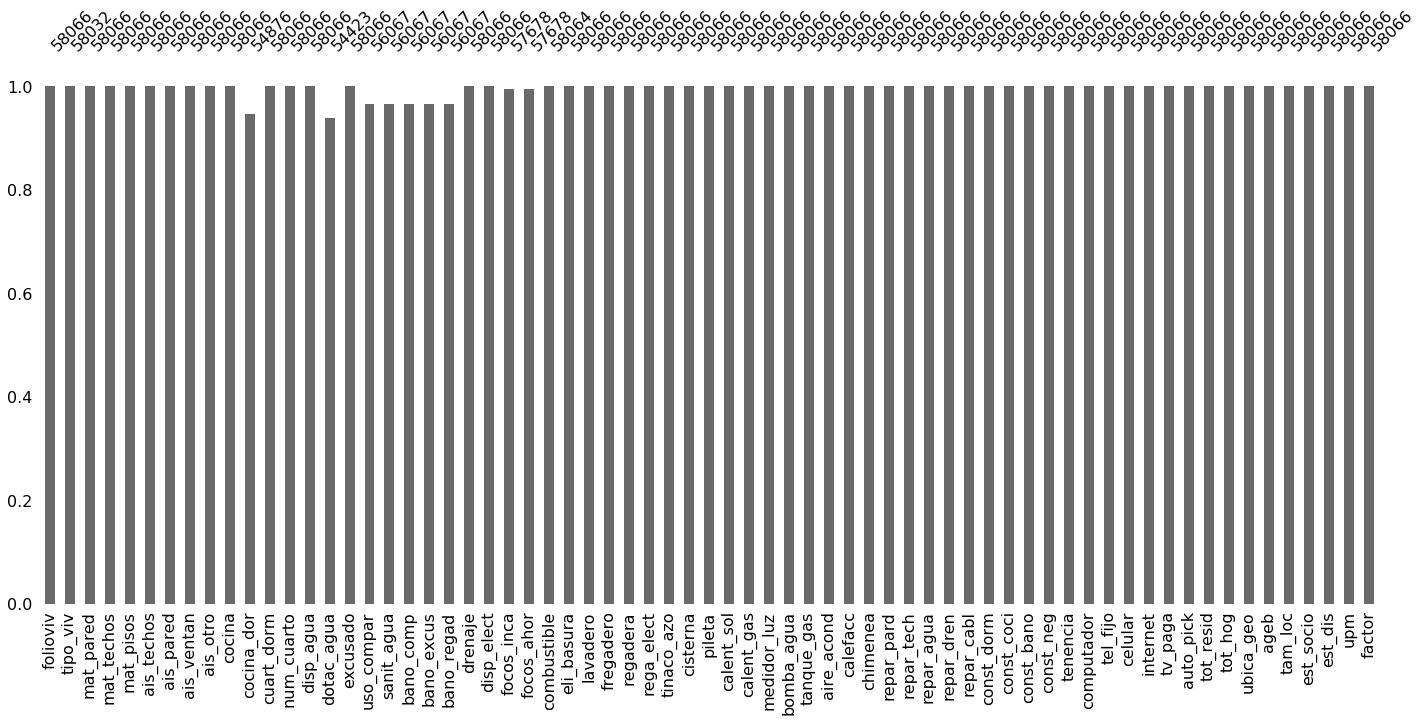

In [49]:
msno.bar(df_copy)

In [50]:
df_copy.isnull().any().any()

True

In [51]:
df_copy.dropna(inplace=True)

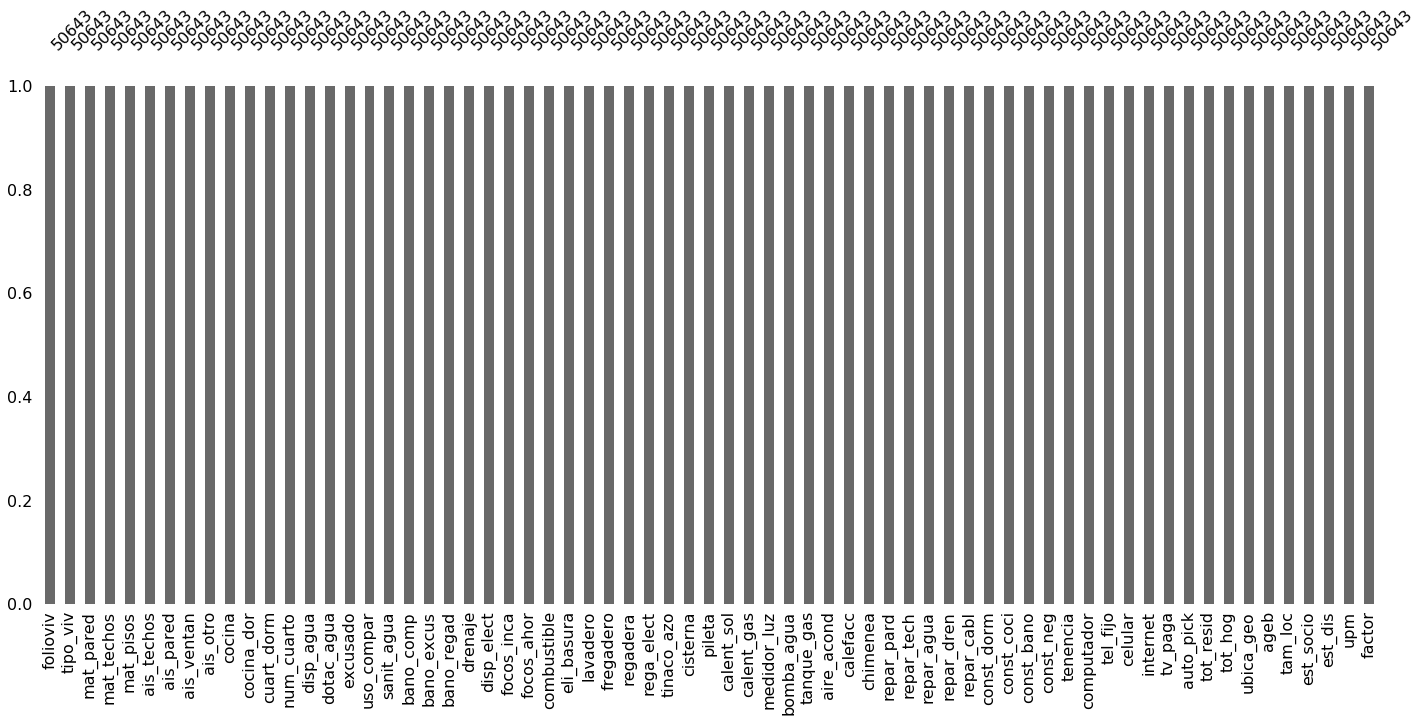

In [52]:
msno.bar(df_copy)

In [53]:
df_copy.isnull().any().any()

False

In [54]:
df_copy.shape

(50643, 67)

In [55]:
file = "../../dataframes/enh/enh_clean.csv"

In [56]:
df_copy.to_csv(file)